###  Import Necessary Libraries

In [1]:
# Importing libraries for model training
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


- Data is now processed with encoded categorical variables, new features, and scaled numerical values.

### Splitting the Data into Train and Test Sets

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data= pd.read_csv("C:/project/Brain-Stroke-Prediction/data/processed/processed_data.csv")

# Splitting data into features and target variable
X = data.drop(columns=['stroke'])
y = data['stroke']

# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- The dataset is split into X_train, X_test, y_train, and y_test with 80% training and 20% testing data.


### Logistic Regression with GridSearchCV

In [3]:
# Logistic Regression Hyperparameter tuning with GridSearchCV
logreg_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l2', 'none']
}

logreg_grid = GridSearchCV(LogisticRegression(), logreg_params, cv=5, verbose=1, n_jobs=-1)
logreg_grid.fit(X_train, y_train)

# Best parameters and model performance
print("Best Parameters:", logreg_grid.best_params_)
logreg_pred = logreg_grid.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Logistic Regression Accuracy: 0.957530218882718
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2931
           1       0.50      0.04      0.07       130

    accuracy                           0.96      3061
   macro avg       0.73      0.52      0.52      3061
weighted avg       0.94      0.96      0.94      3061



- Trained Logistic Regression on the dataset using grid search to tune the best hyperparameters.


### Random Forest Classifier with GridSearchCV

In [4]:
# Random Forest Hyperparameter tuning with GridSearchCV
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best parameters and model performance
print("Best Parameters for Random Forest:", rf_grid.best_params_)
rf_pred = rf_grid.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Accuracy: 0.9581836001306763
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2931
           1       0.57      0.06      0.11       130

    accuracy                           0.96      3061
   macro avg       0.77      0.53      0.54      3061
weighted avg       0.94      0.96      0.94      3061



- Trained Random Forest model using grid search for hyperparameter tuning.

### Support Vector Classifier (SVC) with GridSearchCV

In [5]:
# Support Vector Classifier Hyperparameter tuning with GridSearchCV
svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svc_grid = GridSearchCV(SVC(), svc_params, cv=5, verbose=1, n_jobs=-1)
svc_grid.fit(X_train, y_train)

# Best parameters and model performance
print("Best Parameters for SVC:", svc_grid.best_params_)
svc_pred = svc_grid.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVC Accuracy: 0.957530218882718
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2931
           1       0.00      0.00      0.00       130

    accuracy                           0.96      3061
   macro avg       0.48      0.50      0.49      3061
weighted avg       0.92      0.96      0.94      3061



- Trained Support Vector Classifier (SVC) with hyperparameter tuning using grid search

### Comparing Models

In [6]:
# Comparing the accuracy of all models
models = {
    'Logistic Regression': logreg_grid.best_estimator_,
    'Random Forest': rf_grid.best_estimator_,
    'SVC': svc_grid.best_estimator_
}

for model_name, model in models.items():
    model_pred = model.predict(X_test)
    print(f"{model_name} Accuracy:", accuracy_score(y_test, model_pred))
    print(classification_report(y_test, model_pred))


Logistic Regression Accuracy: 0.957530218882718
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2931
           1       0.50      0.04      0.07       130

    accuracy                           0.96      3061
   macro avg       0.73      0.52      0.52      3061
weighted avg       0.94      0.96      0.94      3061

Random Forest Accuracy: 0.9581836001306763
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2931
           1       0.57      0.06      0.11       130

    accuracy                           0.96      3061
   macro avg       0.77      0.53      0.54      3061
weighted avg       0.94      0.96      0.94      3061

SVC Accuracy: 0.957530218882718
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2931
           1       0.00      0.00      0.00       130

    accuracy                           0.96      3061
   ma

- Evaluated the performance of all trained models on the test data.


### Model Evaluation

Best Model (Random Forest) Accuracy: 0.9581836001306763
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2931
           1       0.57      0.06      0.11       130

    accuracy                           0.96      3061
   macro avg       0.77      0.53      0.54      3061
weighted avg       0.94      0.96      0.94      3061

Confusion Matrix:
[[2925    6]
 [ 122    8]]


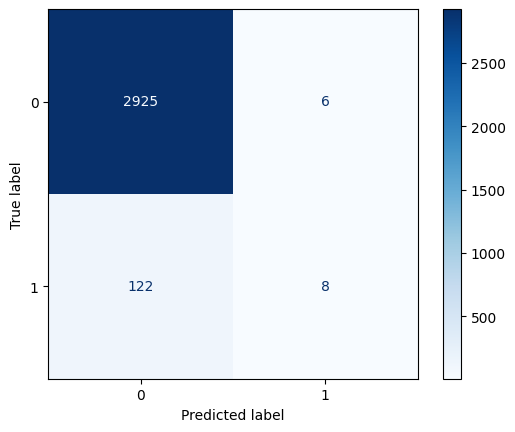

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline
# Evaluate Random Forest as the best model based on GridSearchCV
best_model = rf_grid.best_estimator_

# Predictions
best_model_pred = best_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, best_model_pred)
print(f"Best Model (Random Forest) Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test, best_model_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, best_model_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues')
plt.show()


###  Further Improvements

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Retrain the model using the resampled data
best_model.fit(X_train_res, y_train_res)


RandomForestClassifier(max_depth=10, n_estimators=50)

- Hyperparameter Tuning with Cross-Validation: Continue fine-tuning with different parameters or try ensemble methods like voting classifiers.


In [12]:
from sklearn.ensemble import VotingClassifier

# Example of ensemble
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg_grid.best_estimator_),
    ('rf', rf_grid.best_estimator_),
    ('svc', svc_grid.best_estimator_)
], voting='hard')

ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)

print("Ensemble Model Accuracy:", accuracy_score(y_test, ensemble_pred))


Ensemble Model Accuracy: 0.9578569095066971


### Save the Best Model

In [13]:
import joblib

# Save the best model (Random Forest) for future use
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

In [15]:
import pickle

# Load the saved model
with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load test data
test_data = pd.read_csv('C:/project/Brain-Stroke-Prediction/data/raw/brain_stroke_test.csv')

# Extract features and target from test data
X_test = test_data.drop('heart_disease', axis=1)
y_test = test_data['heart_disease']
